# Home Cage Interaction Analysis

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
# Get the root directory (adjust according to your folder structure)
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Go up one directory to P2_Code
# Add the root directory to sys.path
sys.path.append(root_dir)

from group_tdt_class import *
from experiment_functions import *

In [2]:
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc_csvs"
# brain_region = '#FFAF00'

experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac_csvs"
brain_region = '#15616F'

In [3]:
group_data = GroupTDTData(experiment_path, csv_base_path)
group_data.batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n1-240508-080051\Notes.txt
read from t=0s to t=1783.78s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n2-240508-092906\Notes.txt
read from t=0s to t=1810.33s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n3-240509-062454\Notes.txt
read from t=0s to t=1803.43s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n4-240509-075317\Notes.txt
read from t=0s to t=1802.32s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n5-240823-085032\Notes.txt
read from t=0s to t=1789.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n6-240823-101436\Notes.txt
read from t=0s to t=1793.07s
Found Synapse note file: C:\

In [4]:
group_data.hc_processing()

Home Cage Processing n1-240508-080051...
Home Cage Processing n2-240508-092906...
Home Cage Processing n3-240509-062454...
Home Cage Processing n4-240509-075317...
Home Cage Processing n5-240823-085032...
Home Cage Processing n6-240823-101436...
Home Cage Processing n7-240824-062103...


In [5]:
# Define the custom color palette
custom_palette = ['#FF9F1C', '#0077B6', '#D1E8E2', '#55A630', '#E07A5F', '#FFADAD', '#2C2C54', '#792910']

## Average Investigation Time Per bout

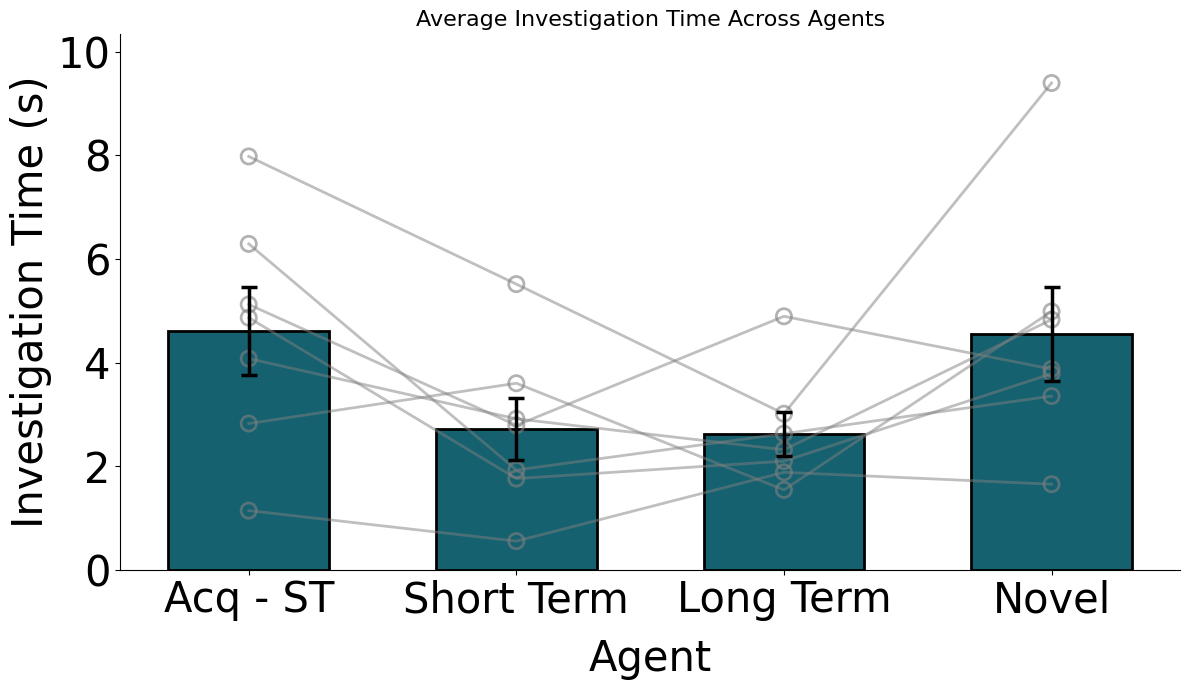

In [6]:
# Define the columns representing the bouts
columns = ['Short_Term_1', 'Short_Term_2', 'Long_Term_1', 'Novel_1' ]

# Extract average investigation durations
avg_inv_duration_df = extract_average_behavior_durations(group_data=group_data, bouts=columns, behavior='Investigation')

# Custom x-tick labels
custom_labels = ['Acq - ST', 'Short Term', 'Long Term', 'Novel']

# Plot the data with custom x-tick labels
# plot_y_across_bouts(avg_inv_duration_df, 'Average Investigation Time Across Bouts', 'Investigation Time (s)', colors=custom_palette, custom_xtick_labels=custom_labels)

plot_y_across_bouts_gray(avg_inv_duration_df, 'Average Investigation Time Across Agents','Investigation Time (s)', custom_xtick_labels=custom_labels,bar_color=brain_region)


## Average Total Investigation Duration per bout

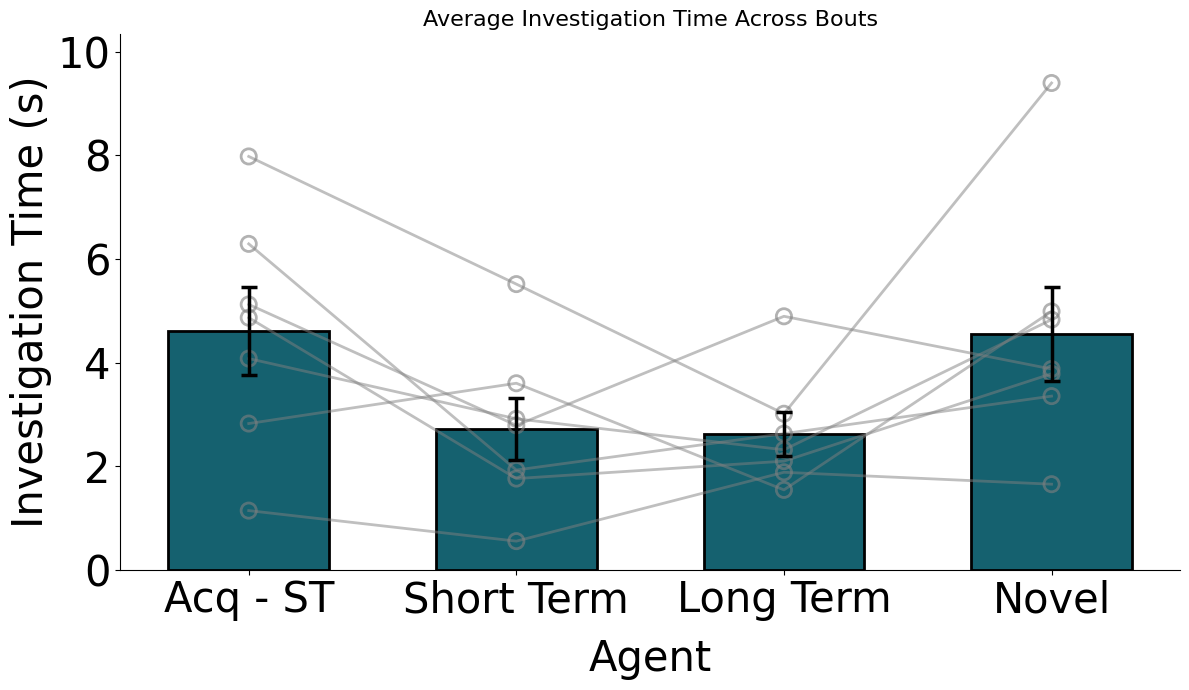

In [7]:
avg_inv_tot_duration_df = extract_average_behavior_durations(group_data=group_data, bouts=columns, behavior = 'Investigation')

# plot_y_across_bouts(avg_inv_tot_duration_df, 'Average Total Investigation Time Across Bouts','Investigation Time (s)', colors=custom_palette, custom_xtick_labels=custom_labels)
plot_y_across_bouts_gray(avg_inv_tot_duration_df, 'Average Investigation Time Across Bouts','Investigation Time (s)', custom_xtick_labels=custom_labels,bar_color=brain_region)

## Mean DA During 1st and 5th Investigation

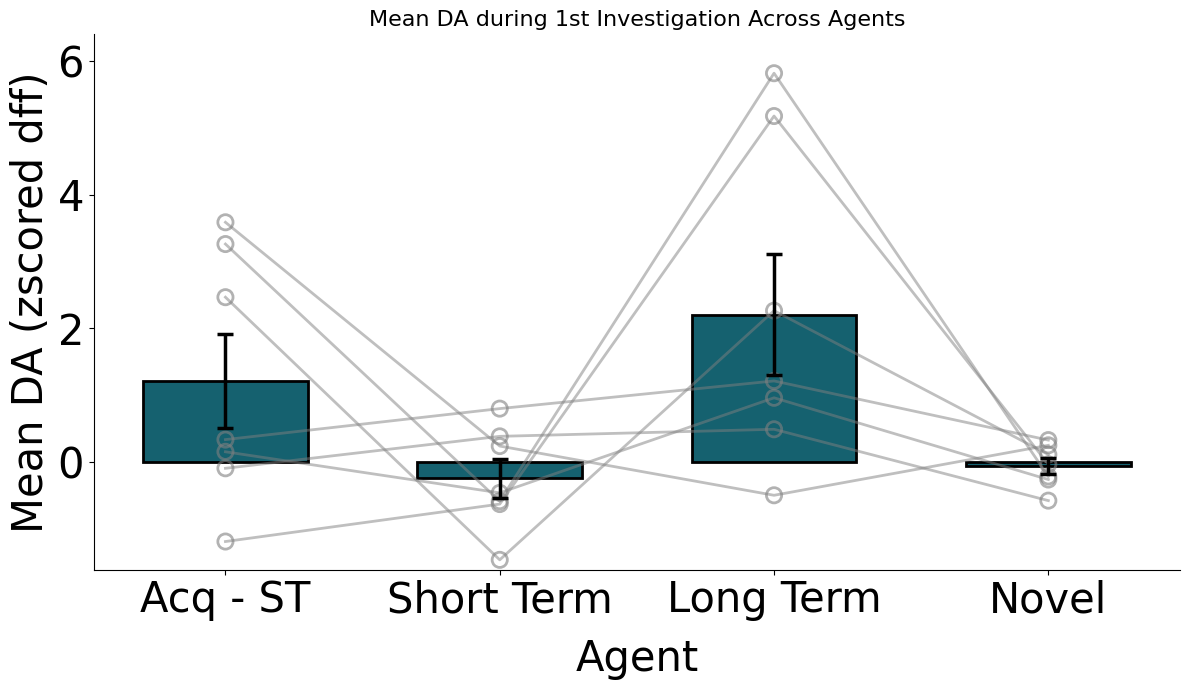

In [8]:
inv_1st_mean_df = extract_nth_behavior_mean_da(group_data=group_data, bouts=columns, behavior='Investigation', n = 1)

# plot_y_across_bouts(inv_1st_mean_df, 'Mean DA during 1st Investigation Across Bouts','Mean DA (zscored dff)')
plot_y_across_bouts_gray(inv_1st_mean_df, 'Mean DA during 1st Investigation Across Agents','Mean DA (zscored dff)', custom_xtick_labels=custom_labels,bar_color=brain_region)

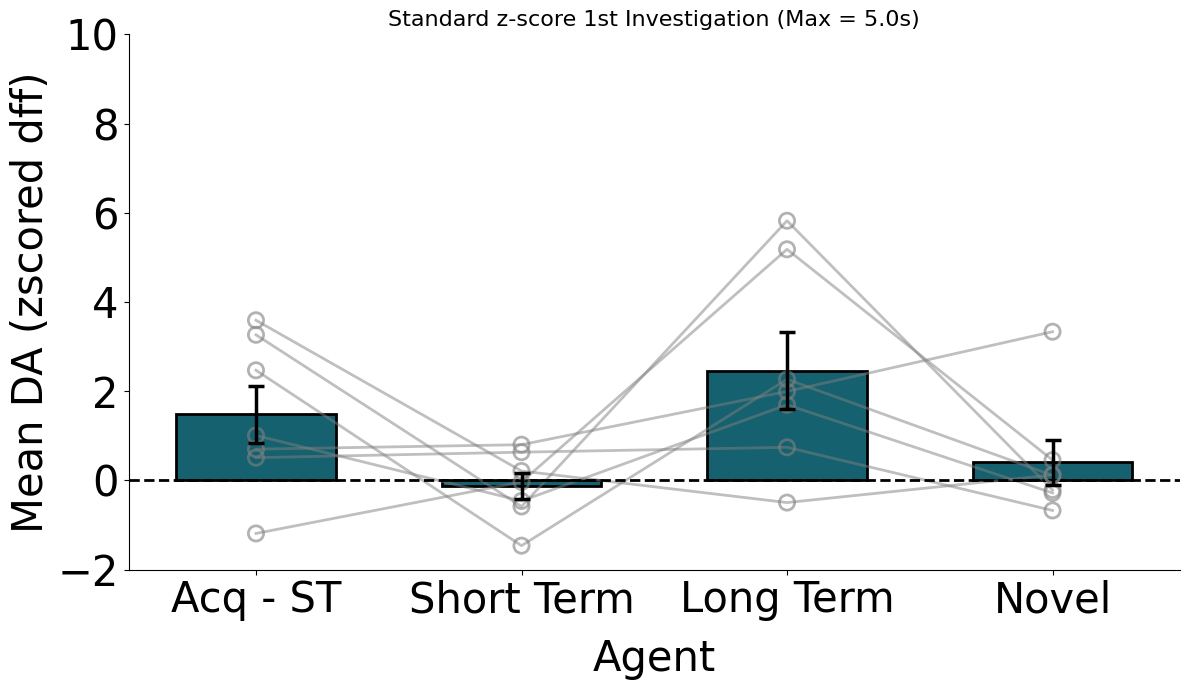

In [9]:
inv_1st_mean_df = extract_nth_behavior_mean_da_corrected(group_data=group_data, bouts=columns, behavior='Investigation', n=1, max_duration=5.0)

plot_y_across_bouts_gray(inv_1st_mean_df, 'Standard z-score 1st Investigation (Max = 5.0s)','Mean DA (zscored dff)', custom_xtick_labels=custom_labels, ylim = (-2,10),bar_color=brain_region)


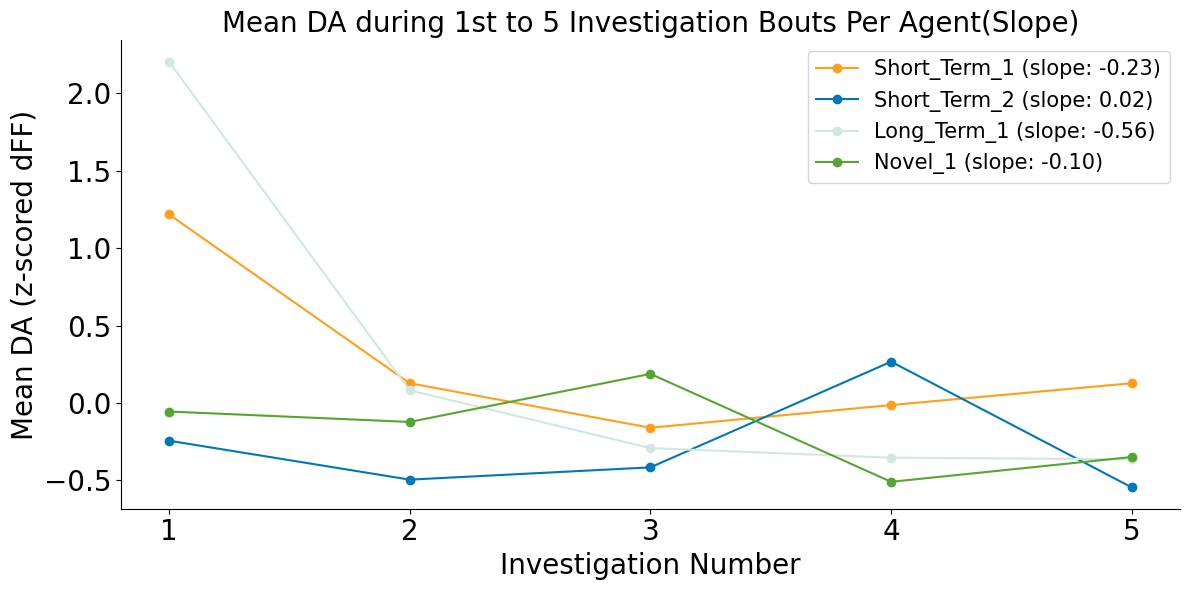

Slope for Short_Term_1: -0.23
Slope for Short_Term_2: 0.02
Slope for Long_Term_1: -0.56
Slope for Novel_1: -0.10


In [10]:
mean_da_df = extract_nth_to_mth_behavior_mean_da(group_data, columns , behavior='Investigation', n_start=1, n_end=5)
plot_meanDA_across_investigations(mean_da_df,columns, max_investigations=5, metric_type='slope',colors=custom_palette, custom_xtick_labels=['1','2','3','4','5'])

## PETH'S

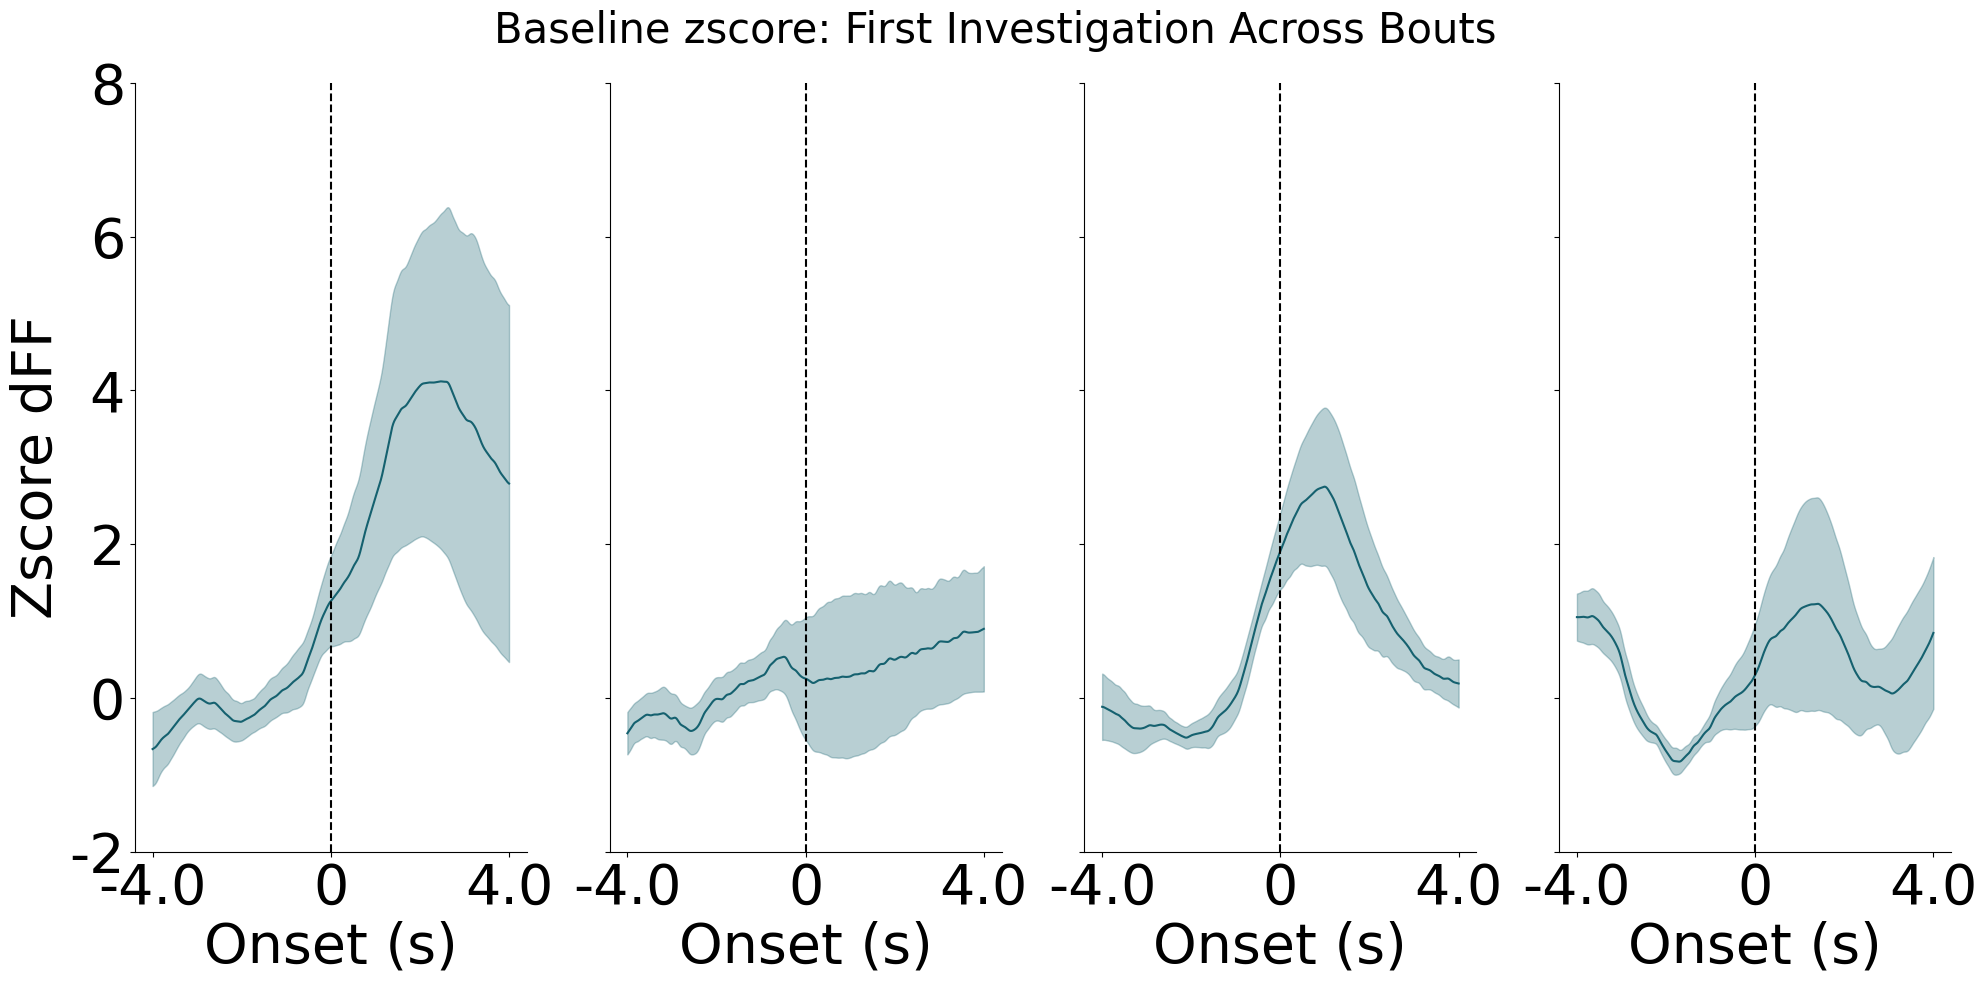

In [16]:
columns = ['Short_Term_1', 'Short_Term_2', 'Long_Term_1', 'Novel_1']

group_data.compute_nth_bout_peth_all_blocks(behavior_name='Investigation', nth_occurrence=1, bouts=columns, pre_time=4, post_time=4)
group_data.plot_peth_for_bouts(signal_type='zscore', error_type='sem', bouts=columns,
                                title='Baseline zscore: First Investigation Across Bouts',color=brain_region
                                ,display_pre_time=4, display_post_time=4)


In [17]:
group_data.plot_1st_event_peth_all_traces()

KeyError: 'time_axis'

<Figure size 1200x600 with 0 Axes>

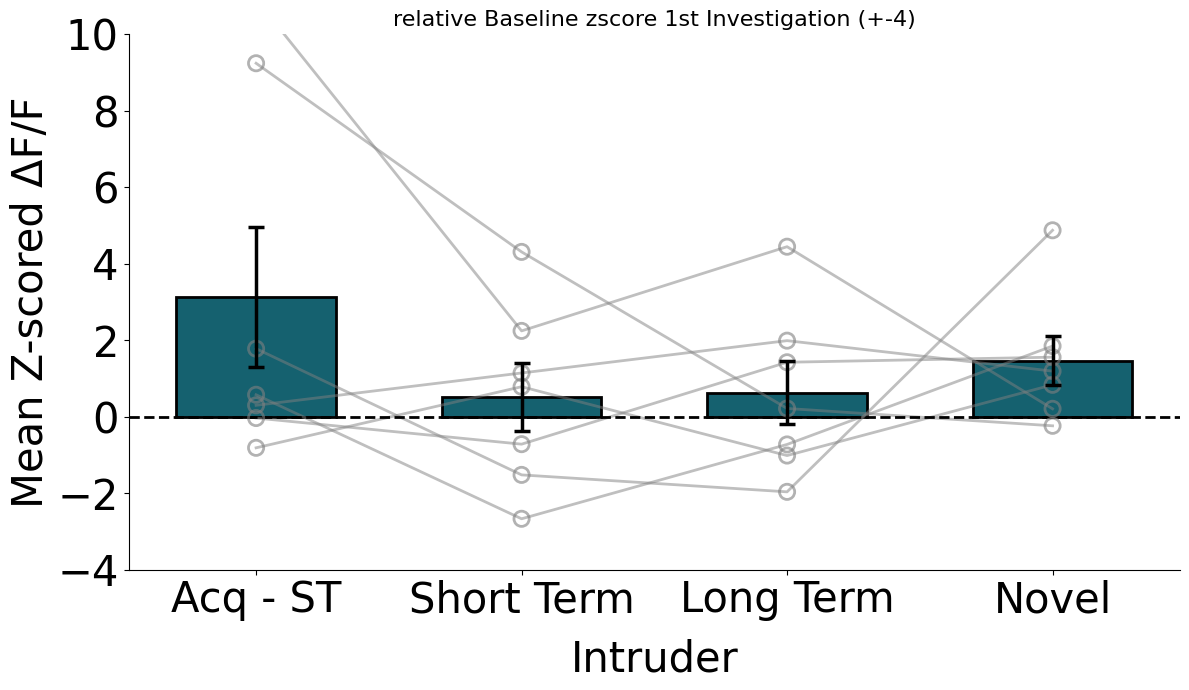

In [12]:
custom_labels = ['Acq - ST', 'Short Term', 'Long Term', 'Novel']
df = extract_nth_behavior_mean_baseline_peth(group_data=group_data, bouts=columns,behavior='Investigation',n=1, windows=[(0,4)], pre_time=4, post_time=4)


# desired_order = ['novel', 'long_term','short_term', 'nothing']
# df  = df[desired_order]
# df   = df.fillna(0)

plot_y_across_bouts_gray(df,title='relative Baseline zscore 1st Investigation (+-4)',ylabel='Mean Z-scored ΔF/F', custom_xtick_labels = custom_labels,bar_color=brain_region, ylim= (-4, 10), yticks_increment=2, xlabel = 'Intruder')

In [13]:
group_data.compute_first_bout_peth_all_blocks_standard(behavior_name='Investigation',bouts= columns, pre_time=5, post_time=5)
group_data.plot_peth_for_bouts(signal_type='zscore', error_type='sem', bouts=columns, title='Standard zscore: First Investigation Across Agents', color=brain_region, custom_xtick_labels=custom_labels)

TypeError: GroupTDTData.plot_peth_for_bouts() got an unexpected keyword argument 'custom_xtick_labels'

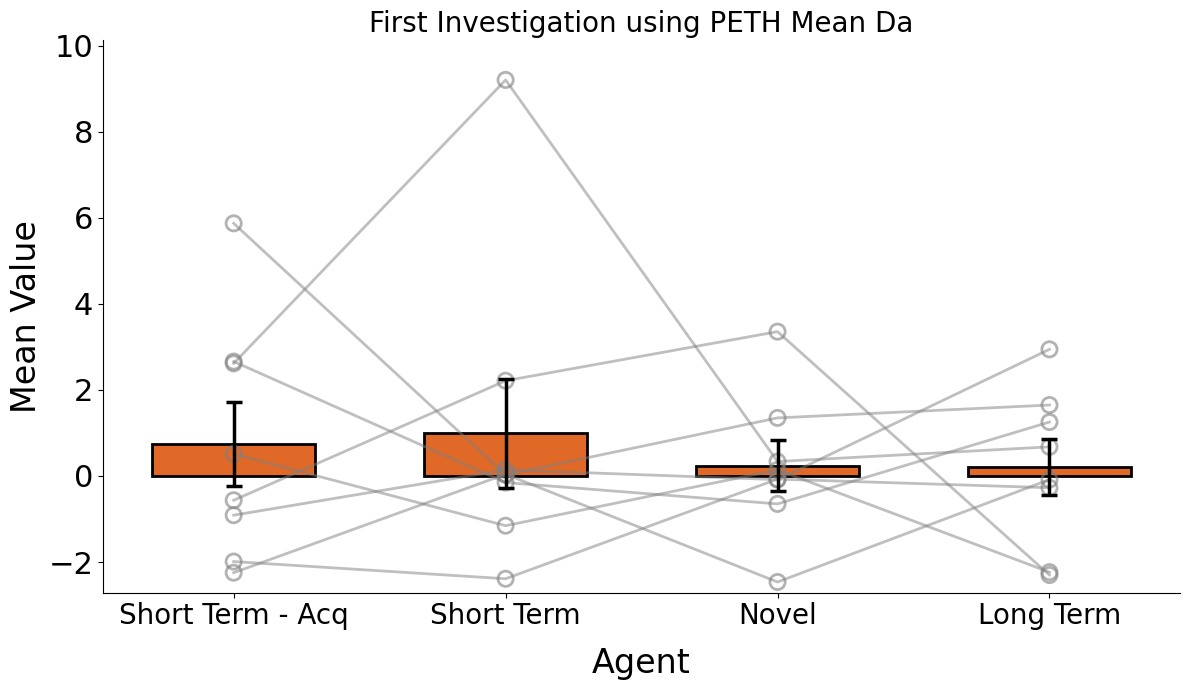

In [15]:
df = extract_nth_behavior_mean_peth(group_data=group_data, bouts=columns,behavior='Investigation',n=1, windows=[(0, 5)])
plot_y_across_bouts_gray(df,title='First Investigation using PETH Mean Da',ylabel='Mean Value', custom_xtick_labels = custom_labels, bar_color=brain_region)

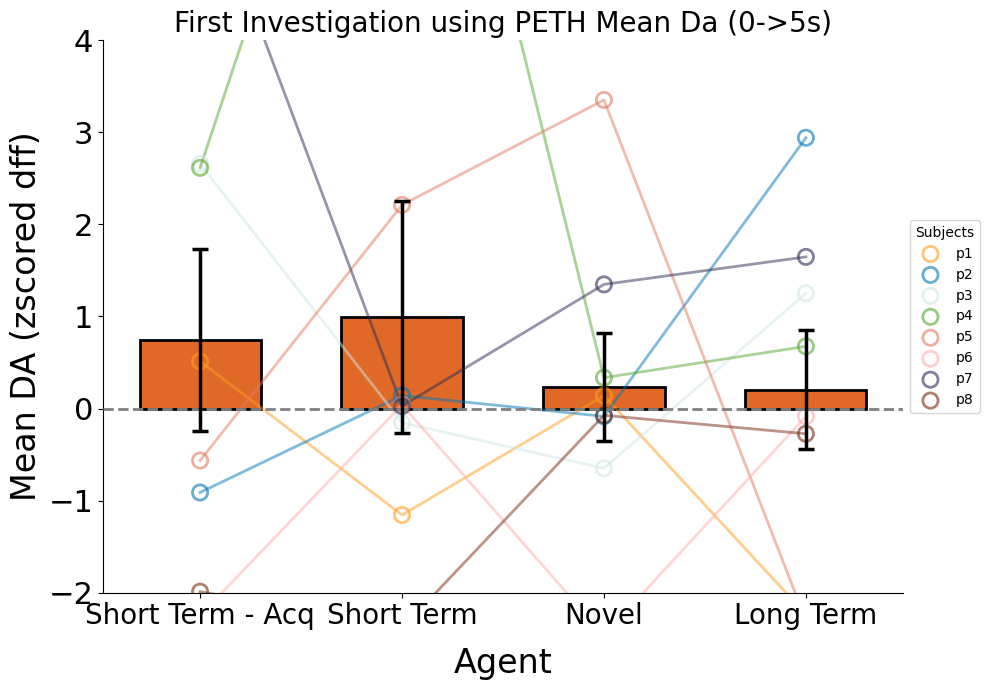

In [16]:
plot_y_across_bouts(df,title='First Investigation using PETH Mean Da (0->5s)',ylabel='Mean DA (zscored dff)', custom_xtick_labels = custom_labels, ylim = (-2,4),bar_color=brain_region)


No occurrences of Approach found in Novel_1.
No occurrences of Approach found in Long_Term_1.
No occurrences of Approach found in Short_Term_2.
No occurrences of Approach found in Novel_1.
No occurrences of Approach found in Long_Term_1.


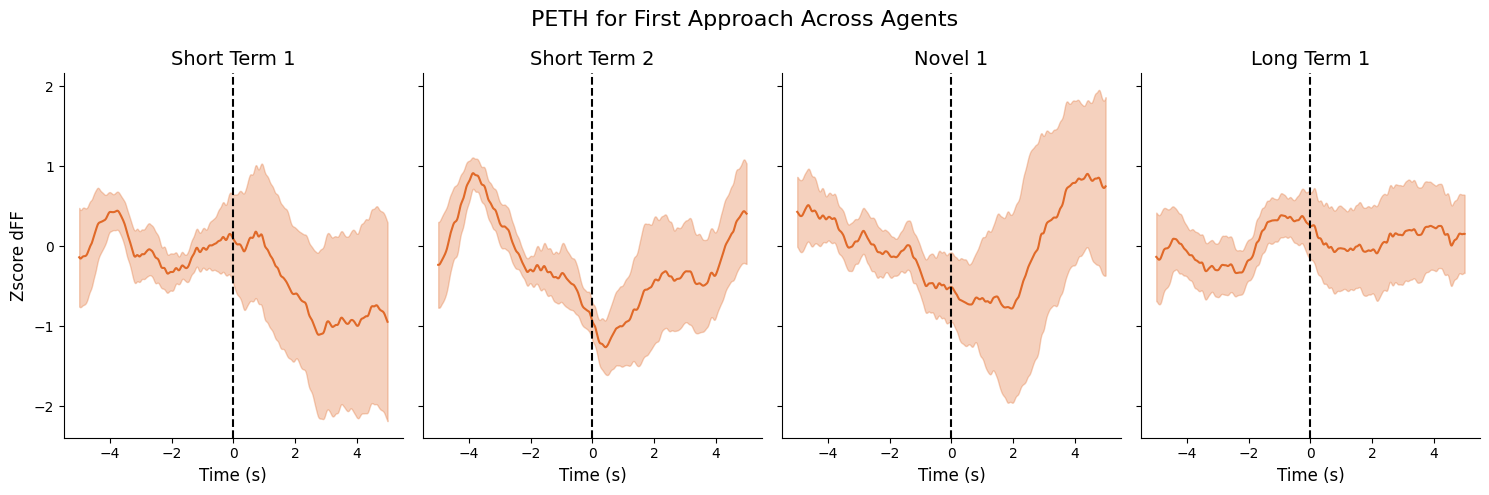

In [17]:
group_data.compute_first_bout_peth_all_blocks(behavior_name='Approach',bouts= columns, pre_time=5, post_time=5)
group_data.plot_peth_for_bouts(signal_type='zscore', error_type='sem', bouts=columns, title='PETH for First Approach Across Agents', color=brain_region)

## Correlation between Investigations and DA Response

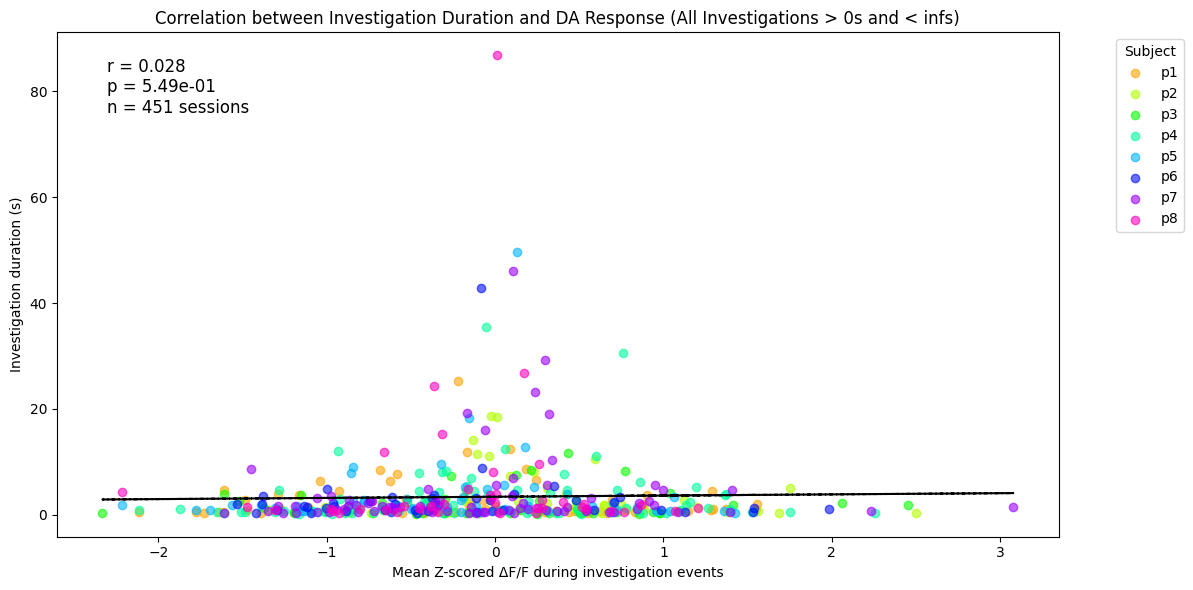

In [18]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=0)

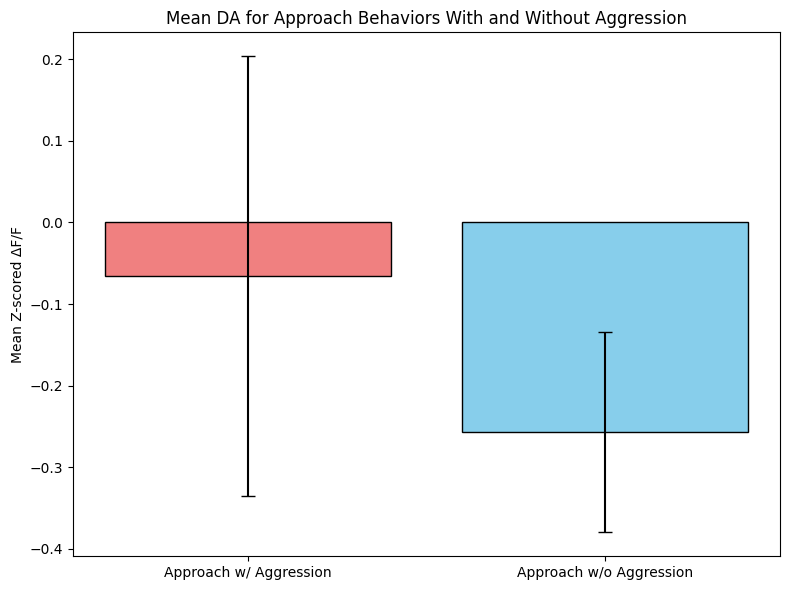

In [19]:
plot_approach_vs_aggression(group_data=group_data, min_duration=0)

In [20]:
# group_data.hc_plot_individual_behavior(behavior_name='all',plot_type='zscore',figsize=(20,8))